# FIND THE THIEF OR THIEVES

## INTRODUCTION

I have visitor log and day that the day of theft.
I have followed five instruction for solving any data scientist problem:
    - Collection Data 
    - Analyzing Data 
    - Data Wrangling 
    - Train & Test 
    - Accuracy Check

Now, i will start to apply these instruction for our case.

### Data Collection

In [2]:
#packages
import numpy as np
#import scipy as scp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set()

In [3]:
#get theft_log dataset
theft_log_path = '/home/mahmut/Documents/DataScience/KocDigital/theft_log.csv'
theft_log_dataset = pd.read_csv(theft_log_path)
theft_log_dataset.head(10)

,2017-01-01
0,2016-12-30
1,2016-12-25
2,2016-12-22
3,2016-12-19
4,2016-12-18
5,2016-12-15
6,2016-12-12
7,2016-12-05
8,2016-11-28
9,2016-11-22


In [4]:
#get visitor_log dataset
visitor_log_path = '/home/mahmut/Documents/DataScience/KocDigital/visitor_log.csv'
visitor_log_dataset = pd.read_csv(visitor_log_path)
visitor_log_dataset.head(10)

,visit_date,name,dob
0,2016-06-16,Samuel Casanova,1990-03-12
1,2016-06-16,Gerald Orozco,1990-10-05
2,2016-06-16,Sharon Davis,1990-10-18
3,2016-06-16,Spencer Spencer,1991-10-13
4,2016-06-16,Steven Estevez,1992-01-13
5,2016-06-16,Frances Bateman,1992-05-06
6,2016-06-16,Roberta Miller,1992-06-25
7,2016-06-16,William Rasmussen,1993-03-17
8,2016-06-16,Robert Shepherd,1993-03-30
9,2016-06-16,Joseph Higgins,1993-05-09


### Data Preprocessing/Cleaning/Wrangling

In [5]:
#i want to add header into the theft_log.csv
theft_log_dataset = pd.read_csv(theft_log_path, sep='\t', names = ["Theft Day"])
theft_log_dataset.head(10)

,Theft Day
0,2017-01-01
1,2016-12-30
2,2016-12-25
3,2016-12-22
4,2016-12-19
5,2016-12-18
6,2016-12-15
7,2016-12-12
8,2016-12-05
9,2016-11-28


In [6]:
#general informatin about theft_day dataset
theft_log_dataset.info()

#we don't have any null data, it is great

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 1 columns):
Theft Day    34 non-null object
dtypes: object(1)
memory usage: 352.0+ bytes


In [7]:
#about theft_log_dataset
theft_log_dataset.describe(include = 'all')

#everything is fine

,Theft Day
count,34
unique,34
top,2016-09-17
freq,1


In [8]:
#is added new column for suspect visitor.
#According to my first analyze; 
# if you are at night club in theft day, 
# i am sorry but i have to suspicion to you.

visitor_log_dataset['suspect'] = np.where(visitor_log_dataset['visit_date'].isin(theft_log_dataset['Theft Day']), 1, 0).astype(int)
visitor_log_dataset.head(10)

,visit_date,name,dob,suspect
0,2016-06-16,Samuel Casanova,1990-03-12,0
1,2016-06-16,Gerald Orozco,1990-10-05,0
2,2016-06-16,Sharon Davis,1990-10-18,0
3,2016-06-16,Spencer Spencer,1991-10-13,0
4,2016-06-16,Steven Estevez,1992-01-13,0
5,2016-06-16,Frances Bateman,1992-05-06,0
6,2016-06-16,Roberta Miller,1992-06-25,0
7,2016-06-16,William Rasmussen,1993-03-17,0
8,2016-06-16,Robert Shepherd,1993-03-30,0
9,2016-06-16,Joseph Higgins,1993-05-09,0


In [9]:
#count the updated data
all_visitor_count = visitor_log_dataset.count()["suspect"]
suspect_visitor_count = visitor_log_dataset[visitor_log_dataset["suspect"] == 1].count()["suspect"]
innocent_visitor_count = visitor_log_dataset[visitor_log_dataset["suspect"] == 0].count()["suspect"]

print('all visitor count      : ', all_visitor_count)
print('suspect visitor count  : ', suspect_visitor_count)
print('innocent visitor count : ', innocent_visitor_count)

all visitor count      :  42727
suspect visitor count  :  7288
innocent visitor count :  35439


In [10]:
#my second analyze; i should calculate age and use for analyzing.
ages = []
for i in visitor_log_dataset['dob']:
    age = pd.to_datetime('today').year-pd.to_datetime(i).year
    ages.append(age)

index = 4
visitor_log_dataset.insert(loc=index, column='age', value=ages)

visitor_log_dataset.head()

,visit_date,name,dob,suspect,age
0,2016-06-16,Samuel Casanova,1990-03-12,0,28
1,2016-06-16,Gerald Orozco,1990-10-05,0,28
2,2016-06-16,Sharon Davis,1990-10-18,0,28
3,2016-06-16,Spencer Spencer,1991-10-13,0,27
4,2016-06-16,Steven Estevez,1992-01-13,0,26


In [11]:
#general informatin about visitor dataset
visitor_log_dataset.info()

#we don't have any null data, it is great.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42727 entries, 0 to 42726
Data columns (total 5 columns):
visit_date    42727 non-null object
name          42727 non-null object
dob           42727 non-null object
suspect       42727 non-null int64
age           42727 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


In [12]:
#about visitor_log_dataset
visitor_log_dataset.describe(include = 'all')

#everything seems like good

,visit_date,name,dob,suspect,age
count,42727,42727,42727,42727.000000,42727.000000
unique,200,985,729,NaN,NaN
top,2016-07-19,Willie Gould,1997-04-10,NaN,NaN
freq,246,177,279,NaN,NaN
mean,NaN,NaN,NaN,0.170571,22.461394
std,NaN,NaN,NaN,0.376138,1.437067
min,NaN,NaN,NaN,0.000000,21.000000
25%,NaN,NaN,NaN,0.000000,21.000000
50%,NaN,NaN,NaN,0.000000,22.000000
75%,NaN,NaN,NaN,0.000000,23.000000


### Data Analyzing/Visualization/Wrangling

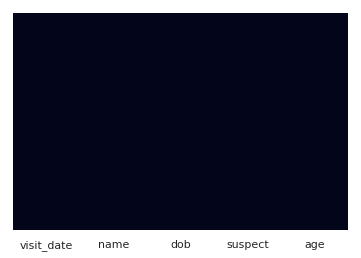

In [13]:
#check the data for null values
sns.heatmap(visitor_log_dataset.isnull(), yticklabels=False, cbar=False)

#that is great

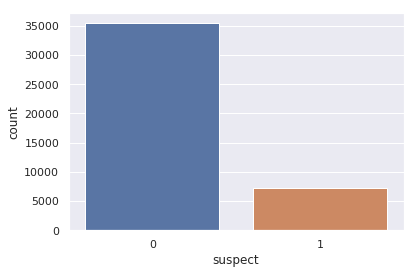

In [14]:
#distribution of suspect
sns.countplot(x='suspect', data=visitor_log_dataset)

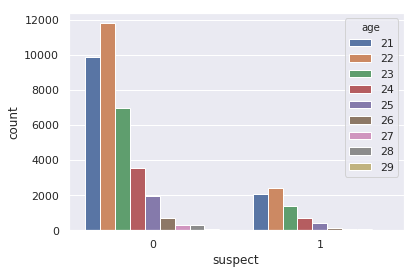

In [15]:
#distribution according to age
sns.countplot(x='suspect', hue='age', data=visitor_log_dataset)

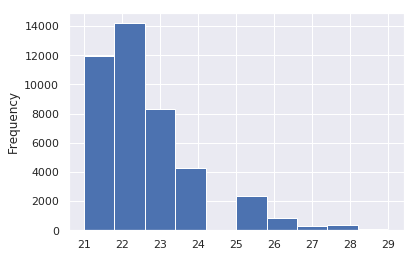

In [16]:
#histogram of age
visitor_log_dataset['age'].plot.hist()

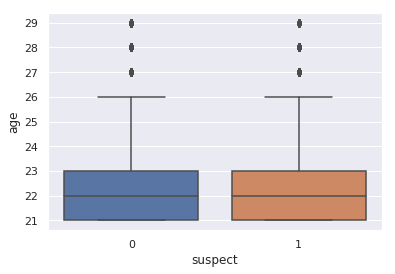

In [17]:
#analysis relationship between suspect and age
sns.boxplot(x='suspect', y='age', data=visitor_log_dataset)

In [18]:
#so i think age is not important or it is not decisive...
#then we can remove the date of birth and age columns

visitor_log_dataset.drop(['dob', 'age'], axis=1, inplace=True)

In [19]:
#and also visit_date is not necessary, because i used it and insert suspect column
#then i can remove this column

visitor_log_dataset.drop(['visit_date'], axis=1, inplace=True)

In [20]:
#get the first 10 data
visitor_log_dataset.head(10)

#it is clear dataset
#we should continue analyze...

,name,suspect
0,Samuel Casanova,0
1,Gerald Orozco,0
2,Sharon Davis,0
3,Spencer Spencer,0
4,Steven Estevez,0
5,Frances Bateman,0
6,Roberta Miller,0
7,William Rasmussen,0
8,Robert Shepherd,0
9,Joseph Higgins,0


In [21]:
#frequency of visitor
frequency_visitor = visitor_log_dataset.groupby(['name']).size().to_frame('size').reset_index().sort_values(['size', 'name'], ascending=[False, True])
frequency_visitor.head(20)

,name,size
976,Willie Gould,177
327,Henry Brunson,169
129,Christine Victoria,166
157,Dale Kirkwood,164
54,Arthur Freund,160
729,Patricia Whitley,153
800,Roger Ballance,149
888,Suzanne Larson,149
60,Barbara Mchale,148
1,Ada Tejeda,145


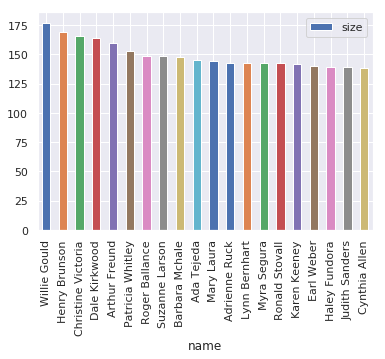

In [22]:
#distribution for visitor frequency
frequency_visitor_twenty = frequency_visitor.head(20)
frequency_visitor_twenty.plot(kind='bar',x='name',y='size')
plt.show()

In [23]:
#top visitor with suspect_flag
frequency_visitor_with_suspect = visitor_log_dataset.groupby(['name', 'suspect']).size().to_frame('size').reset_index().sort_values(['size', 'suspect'], ascending=[False, True])
frequency_visitor_with_suspect.head(20)

,name,suspect,size
1870,Willie Gould,0,154
627,Henry Brunson,0,142
246,Christine Victoria,0,139
301,Dale Kirkwood,0,138
101,Arthur Freund,0,134
1401,Patricia Whitley,0,126
1702,Suzanne Larson,0,124
2,Ada Tejeda,0,123
113,Barbara Mchale,0,123
1536,Roger Ballance,0,123


In [24]:
#top 20 visitor
first_twenty_name = {}
first_twenty_suspect = frequency_visitor_with_suspect['name'].head(20)
for i in range(0,5,1):
    first_twenty_name = frequency_visitor_with_suspect[frequency_visitor_with_suspect.name.isin(first_twenty_suspect)]

first_twenty_name

,name,suspect,size
1870,Willie Gould,0,154
627,Henry Brunson,0,142
246,Christine Victoria,0,139
301,Dale Kirkwood,0,138
101,Arthur Freund,0,134
1401,Patricia Whitley,0,126
1702,Suzanne Larson,0,124
2,Ada Tejeda,0,123
113,Barbara Mchale,0,123
1536,Roger Ballance,0,123


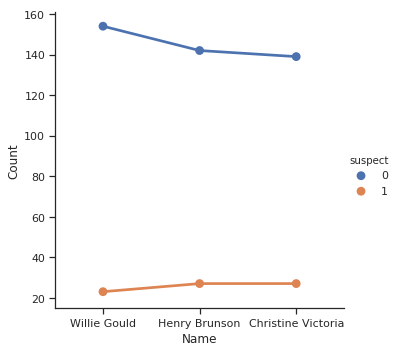

In [25]:
#distribution for top 3 visitor
first_three_name = {}
first_three_suspect = frequency_visitor_with_suspect['name'].head(3)
for i in range(0,5,1):
    first_three_name = frequency_visitor_with_suspect[frequency_visitor_with_suspect.name.isin(first_three_suspect)]

with sns.axes_style(style='ticks'):
    g = sns.catplot("name", "size", "suspect", data=first_three_name, kind="point")
    g.set_axis_labels("Name", "Count");
    
#It is very basic visualization but give me good detail.
#For example William Gould is top visitor but smaller than Christine Victoria for theft day.
#So i have to focus maximum count of visit in theft day and minimum count of visit in total for each person!!!
#That is my way...

i need to logic_matrix that is to include;
    -count of visit in theft days, 
    -count of visit in other days, 
    -total count of visit 
    -and knowledge of who it is (name column)

In [26]:
#all visitor name
count_matrix = pd.DataFrame(data=visitor_log_dataset.name.unique())
count_matrix.columns= ['name']
count_matrix.head(5)

,name
0,Samuel Casanova
1,Gerald Orozco
2,Sharon Davis
3,Spencer Spencer
4,Steven Estevez


In [27]:
#no null variable
count_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 1 columns):
name    985 non-null object
dtypes: object(1)
memory usage: 7.8+ KB


In [28]:
#unique
count_matrix.describe()

,name
count,985
unique,985
top,Freddie Longoria
freq,1


In [29]:
#calculate suspect day
count_suspect = visitor_log_dataset[(visitor_log_dataset.suspect == 1)].groupby('name', as_index=False).agg({"suspect": "count"})
count_suspect.columns = ['name', 'count_suspect']
count_suspect.head(5)

,name,count_suspect
0,Aaron Nelson,11
1,Ada Tejeda,22
2,Adam Berry,5
3,Adam Dorsette,4
4,Adam Johnson,13


In [30]:
#calculate other day
count_innocent = visitor_log_dataset[(visitor_log_dataset.suspect == 0)].groupby('name', as_index=False).agg({"suspect": "count"})
count_innocent.columns = ['name', 'count_innocent']
count_innocent.head(5)

,name,count_innocent
0,Aaron Nelson,56
1,Ada Tejeda,123
2,Adam Berry,21
3,Adam Dorsette,9
4,Adam Johnson,60


In [31]:
#update count_matrix
count_matrix = pd.merge(count_matrix, count_suspect[['name','count_suspect']], on='name', how='left')
count_matrix = pd.merge(count_matrix, count_innocent[['name','count_innocent']], on='name', how='left')
count_matrix

,name,count_suspect,count_innocent
0,Samuel Casanova,11.0,38.0
1,Gerald Orozco,2.0,19.0
2,Sharon Davis,1.0,39.0
3,Spencer Spencer,14.0,91.0
4,Steven Estevez,11.0,55.0
5,Frances Bateman,20.0,117.0
6,Roberta Miller,13.0,71.0
7,William Rasmussen,15.0,61.0
8,Robert Shepherd,12.0,61.0
9,Joseph Higgins,9.0,33.0


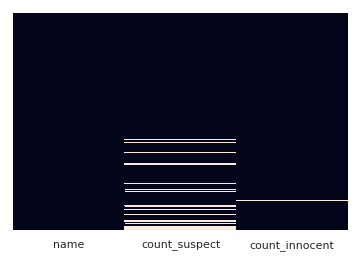

In [32]:
#check NaN value
sns.heatmap(count_matrix.isnull(), yticklabels=False, cbar=False)

In [33]:
#convert from Nan to 0
count_matrix = count_matrix.fillna(0)

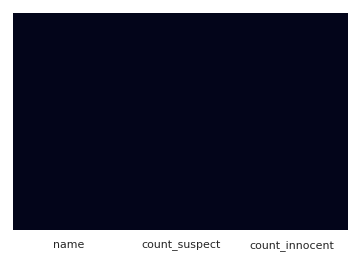

In [34]:
#updated dataframe
sns.heatmap(count_matrix.isnull(), yticklabels=False, cbar=False)

In [35]:
#last one 
count_matrix['count_total'] = count_matrix['count_suspect'] + count_matrix['count_innocent']

In [36]:
#that is fantastic, count_total greater than zero for probability.
count_matrix.describe()

,count_suspect,count_innocent,count_total
count,985.000000,985.000000,985.000000
mean,7.398985,35.978680,43.377665
std,6.220557,29.152155,34.963010
min,0.000000,0.000000,1.000000
25%,2.000000,13.000000,16.000000
50%,6.000000,29.000000,35.000000
75%,11.000000,52.000000,63.000000
max,30.000000,154.000000,177.000000


In [37]:
#calculate probability
count_matrix['probability'] = count_matrix['count_suspect'] / count_matrix['count_total']
count_matrix

,name,count_suspect,count_innocent,count_total,probability
0,Samuel Casanova,11.0,38.0,49.0,0.224490
1,Gerald Orozco,2.0,19.0,21.0,0.095238
2,Sharon Davis,1.0,39.0,40.0,0.025000
3,Spencer Spencer,14.0,91.0,105.0,0.133333
4,Steven Estevez,11.0,55.0,66.0,0.166667
5,Frances Bateman,20.0,117.0,137.0,0.145985
6,Roberta Miller,13.0,71.0,84.0,0.154762
7,William Rasmussen,15.0,61.0,76.0,0.197368
8,Robert Shepherd,12.0,61.0,73.0,0.164384
9,Joseph Higgins,9.0,33.0,42.0,0.214286


In [38]:
#we finish pretty much
suspects = count_matrix.sort_values('probability', ascending=False).head(20)
suspects

,name,count_suspect,count_innocent,count_total,probability
612,Oneida Randall,11.0,0.0,11.0,1.000000
851,Mary Redwine,2.0,0.0,2.0,1.000000
723,Gabriel Kusel,4.0,0.0,4.0,1.000000
271,Shirley Ivey,6.0,2.0,8.0,0.750000
291,Joseph Blanco,2.0,1.0,3.0,0.666667
781,Martha Holland,2.0,1.0,3.0,0.666667
791,Loretta Massey,10.0,7.0,17.0,0.588235
938,Irene Bean,1.0,1.0,2.0,0.500000
981,Velma Smith,1.0,1.0,2.0,0.500000
827,Jennifer Bell,4.0,4.0,8.0,0.500000


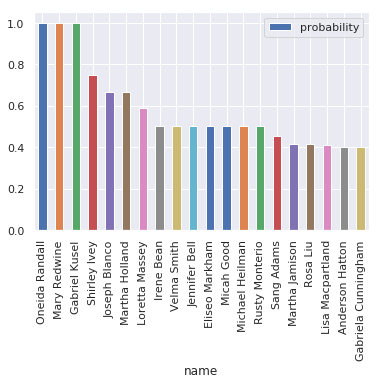

In [39]:
#result as graph
suspects.plot(kind='bar',x='name',y='probability')
plt.show()

### CONCLUSION

All of them very important analysis but not enough, we need to a lot of variable because;

    - you can be very close friend her so you may have been in the nightclub every day
    - or you work in the nightclub so you have to go every day
    - or you love this club and you and your friend may go to many times
    - or some boss want to go office everyday but some boss not
      so may be maximum visitor is boss but may not be
    - and i read a little bir document about thieves, thieves don't go again where they steal.
    
Since I have very little data variety, I was able to extract only the above analyzes.
However, as I mentioned above, having a variety of variables will be more accurate.

Best Regards.